# Image Processing Assessment

Hãy hoàn thành các task in đậm bên dưới.

**Dưới đây là một số code hữu ích:**

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
def display_img(img,cmap=None):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

**TASK: Mở và hiển thị ảnh giaraffes.jpg nằm trong folder DATA.** 

In [3]:
image = cv2.imread('giaraffes.jpg') 

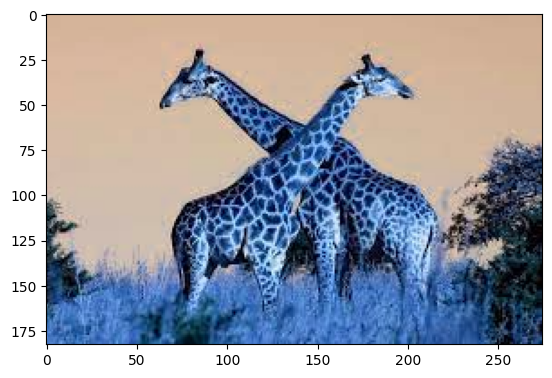

In [4]:
plt.imshow(image)
# show ảnh theo BGR

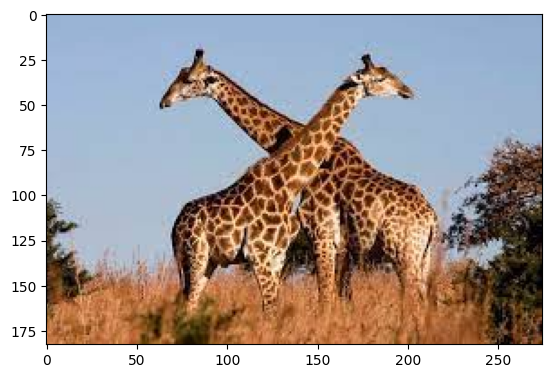

In [5]:
RGB_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# Chuyển ảnh về màu RGB tức à màu gốc
plt.imshow(RGB_img)

# plt.axis('off')  # Tắt trục
# plt.show()

**TASK: Áp dụng ngưỡng nhị phân vào ảnh.** 

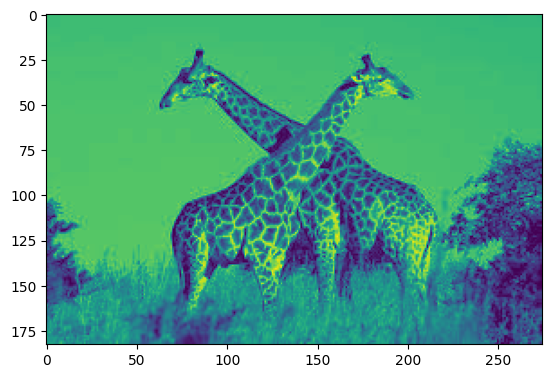

In [6]:
img_binary = cv2.imread("giaraffes.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(img_binary)


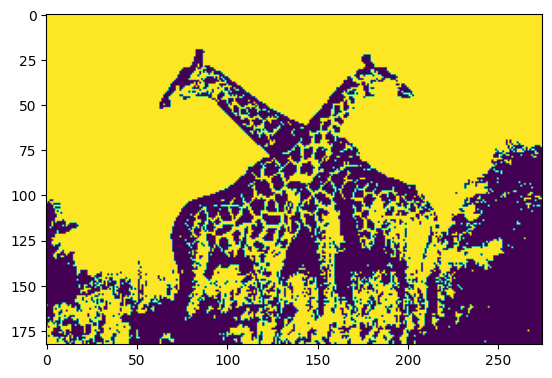

In [7]:
# Áp dụng ngưỡng nhị phân (ví dụ, ngưỡng = 128)
_, binary_img = cv2.threshold(img_binary, 128, 255, cv2.THRESH_BINARY)
plt.imshow(binary_img)

**TASK: Mở file giaraffes.jpg từ folder DATA, chuyển không gian màu của nó thành HSV và hiển thị ảnh.** 

In [8]:
# Đọc hình ảnh từ tệp
img_new = cv2.imread("giaraffes.jpg")

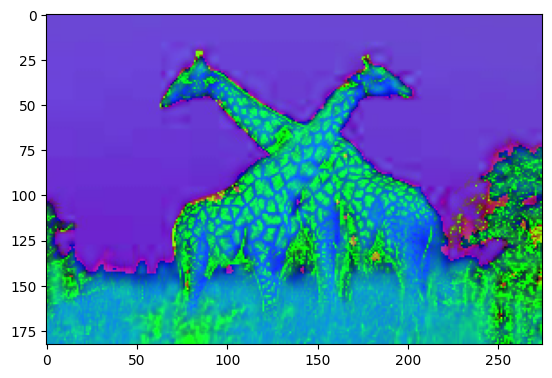

In [9]:

# Chuyển không gian màu sang HSV
hsv_img = cv2.cvtColor(img_new, cv2.COLOR_BGR2HSV)
plt.imshow(hsv_img)
plt.show()


**TASK: Tạo low pass filter với 4x4 kernel chứa các giá trị 1/10 (0.01) rồi sử dụng 2-D Convolution để làm mờ ảnh hươu (hiển thị ở RGB chuẩn).** 

In [10]:
import cv2
import numpy as np

# Đọc hình ảnh "hươu", thay vì đọc thì sử dụng ảnh cũ với màu RGB
img = RGB_img



In [11]:
kernel = np.array([[0.01, 0.01, 0.01, 0.01],
                   [0.01, 0.01, 0.01, 0.01],
                   [0.01, 0.01, 0.01, 0.01],
                   [0.01, 0.01, 0.01, 0.01]], dtype= float)
print(kernel)

[[0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01]
 [0.01 0.01 0.01 0.01]]


In [12]:
# Áp dụng phép Convolution 2D để làm mờ ảnh
blurred_img = cv2.filter2D(img, -1, kernel)



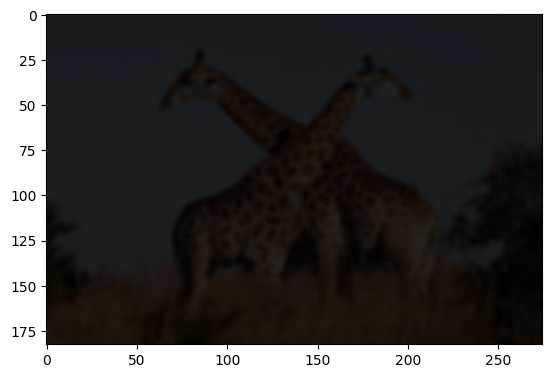

In [13]:
# Hiển thị ảnh sau khi đã làm mờ (RGB chuẩn)
plt.imshow(blurred_img)

**TASK: Tạo Horizontal Sobel Filter (sobelx từ bài giảng) với kích thước kernel là 5 cho bản grayscale của ảnh hươu rồi hiển thị phiên bản hình ảnh đã lọc gradient.** 

In [14]:
import cv2
import numpy as np

# Đọc ảnh "hươu" và chuyển sang ảnh xám
img_gra = cv2.imread("giaraffes.jpg", cv2.IMREAD_GRAYSCALE)



In [15]:
# Định nghĩa kernel của bộ lọc Sobel ngang
sobelx = np.array([[-1, -2, -1, 0, 1],
                   [-2, -3, -2, 0, 2],
                   [-1, -2, -1, 0, 1],
                   [0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0]])

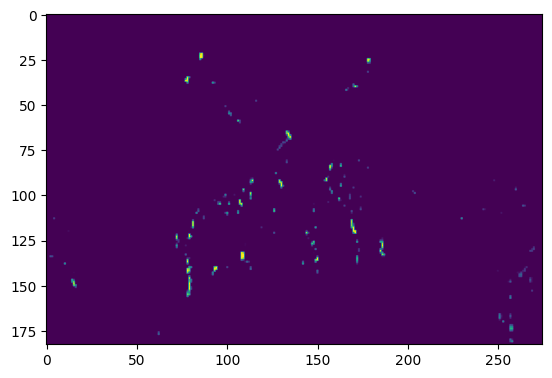

In [16]:
# Áp dụng phép Convolution 2D với kernel Sobel ngang
gradient_img = cv2.filter2D(img_gra, -1, sobelx)
plt.imshow(gradient_img)

**TASK: Vẽ histogram màu cho kênh RED, BLUE và GREEn của ảnh hươu. Đặc biệt chú ý tới thứ tự các kênh.** 

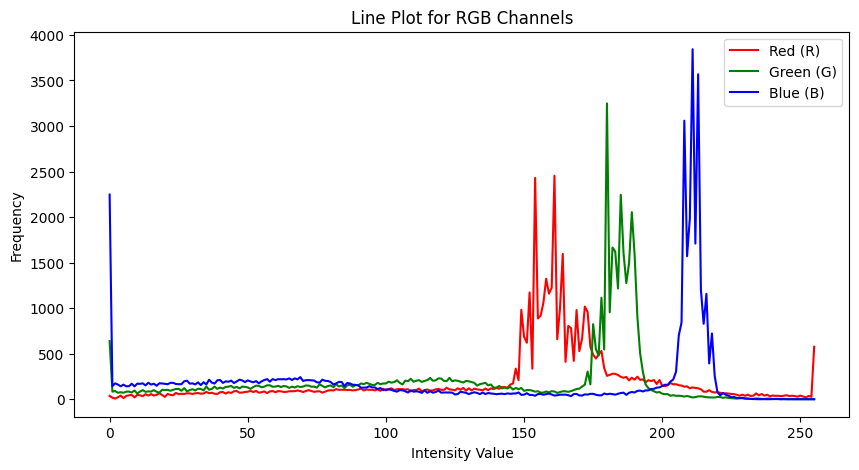

In [17]:
import cv2
import matplotlib.pyplot as plt

# Đọc ảnh "hươu"
img = cv2.imread("giaraffes.jpg")

# Chia thành các kênh màu R, G, B
b, g, r = cv2.split(img)

# Tạo biểu đồ
plt.figure(figsize=(10, 5))

# Tạo mảng giá trị cường độ từ 0 đến 255
intensity_values = list(range(256))

# Vẽ biểu đồ dạng line cho kênh màu Red (R)
plt.plot(intensity_values, cv2.calcHist([r], [0], None, [256], [0, 256]), color='red', label='Red (R)')
"""
r: Đây là kênh màu của ảnh mà bạn muốn tính toán histogram. Trong ví dụ này, r đại diện cho kênh màu đỏ (Red).

[0]: Đối số này chỉ định kênh bạn muốn tính toán histogram. Trong trường hợp này, [0] là chỉ mục của kênh màu trong không gian màu BGR (hoặc RGB). Trong không gian màu BGR/RGB, kênh màu Red thường có chỉ mục 0.

None: Đây là mặt nạ (mask), bạn có thể sử dụng nó để giới hạn phạm vi tính toán histogram cho một phần của ảnh. Trong trường hợp này, chúng ta không sử dụng mặt nạ, vì chúng ta muốn tính toán histogram cho toàn bộ kênh màu Red.

[256]: Đối số này xác định số lượng ngăn (bins) trong histogram, tức là số lượng cường độ khác nhau mà histogram sẽ theo dõi. Trong trường hợp này, chúng ta chia cường độ từ 0 đến 255 thành 256 ngăn.

[0, 256]: Đối số này xác định phạm vi cường độ của histogram. Trong trường hợp này, histogram sẽ theo dõi cường độ từ 0 đến 255, bất kể giá trị cường độ trong khoảng này.
"""
# Vẽ biểu đồ dạng line cho kênh màu Green (G)
plt.plot(intensity_values, cv2.calcHist([g], [0], None, [256], [0, 256]), color='green', label='Green (G)')

# Vẽ biểu đồ dạng line cho kênh màu Blue (B)
plt.plot(intensity_values, cv2.calcHist([b], [0], None, [256], [0, 256]), color='blue', label='Blue (B)')

plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.title('Line Plot for RGB Channels')
plt.legend()
plt.show()
